STO3G 4Q UCC POWELL

In [1]:
#loading libraries
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from scipy.optimize import curve_fit
from scipy.stats import shapiro
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions
from scipy.stats import norm
from scipy.optimize import minimize
%matplotlib inline
from scipy.stats import lognorm

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Exact Result: -1.0011251956327838 HF energy: -0.9163768770236478 Exact correlation energy: -0.08474831860913601

In [4]:
with open("Exact_Sol_STO3G_4Q_UCC_POWELL.txt","r") as f: 
    Ref_Energy = f.read()

print(Ref_Energy)

-1.0011251956327838


In [5]:
with open("STO3G_4Q_UCC_POWELL.txt","r") as f: 
    vqe_6G = f.read().splitlines()
#    vqe_6G.remove("Vqe Result")
    vqe_6G = list(map(float,vqe_6G))
print(len(vqe_6G))

100


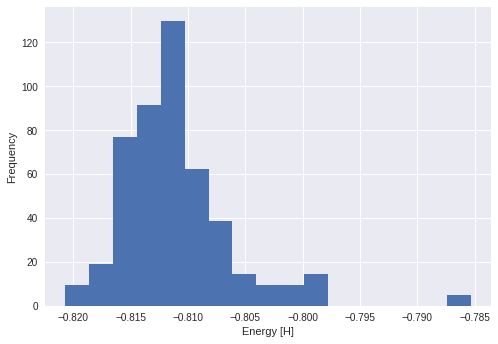

In [6]:
with plt.style.context('seaborn'):
    plt.hist(vqe_6G,density=True,bins='auto')
    plt.xlabel('Energy [H]')
    plt.ylabel('Frequency')
    plt.show()

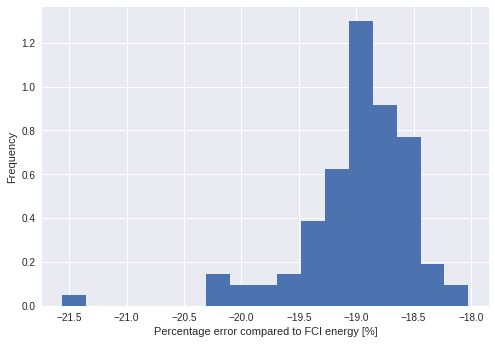

In [7]:
#Histogram of the percentage deviation from reference data for the tests
# orginal 100*(np.array(ens)-REFERENCE_energy)/REFERENCE_energy
with plt.style.context('seaborn'):
    #plt.hist(100*(float(Ref_Energy)-np.array(vqe_6G))/float(Ref_Energy),density=True,bins='auto')
    plt.hist(100*(np.array(vqe_6G)-float(Ref_Energy))/float(Ref_Energy),density=True,bins='auto')
    plt.xlabel('Percentage error compared to FCI energy [%]')
    plt.ylabel('Frequency')
    plt.show()

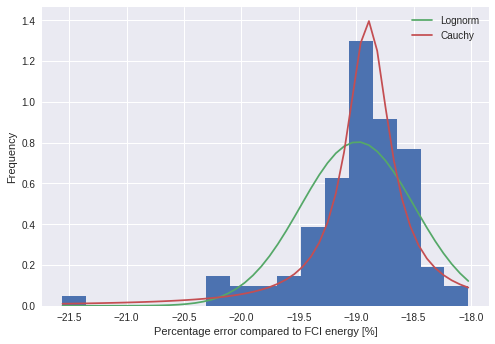

In [8]:
err =100*(np.array(vqe_6G)-float(Ref_Energy))/float(Ref_Energy)

[s_fit,loc_fit,scale_fit] = scipy.stats.lognorm.fit(err)
[loc2_fit,scale2_fit] = scipy.stats.cauchy.fit(err)
x = np.linspace(np.min(err),np.max(err))

with plt.style.context('seaborn'):
    plt.hist(err,bins = 'auto',density = True) #plotting rating hist
    plt.plot(x,scipy.stats.lognorm.pdf(x,s_fit,loc=loc_fit,scale=scale_fit),label='Lognorm')
    plt.plot(x,scipy.stats.cauchy.pdf(x,loc=loc2_fit,scale=scale2_fit),label='Cauchy')
    plt.xlabel('Percentage error compared to FCI energy [%]')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

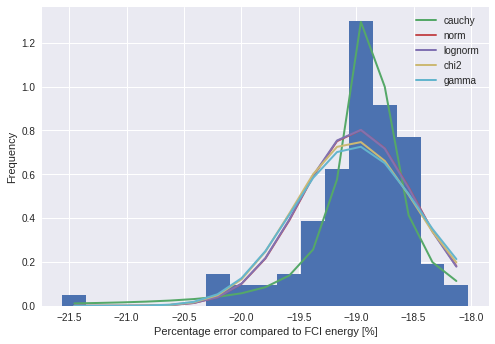

In [9]:
with plt.style.context('seaborn'):
    f = Fitter(err, 
           distributions= get_common_distributions(),bins='auto')
#Using fitter to gather loads of different distributions and calculate aic to rank them 
    f.fit() #showing fits
    f.summary() #displaying summary table
    plt.xlabel('Percentage error compared to FCI energy [%]')
    plt.ylabel('Frequency')
    plt.show()

In [10]:
stat, p = shapiro(err)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.878, p=0.000
Probably not Gaussian
